In [1]:
import sys
import os
sys.path.append("../")

import tensorflow as tf
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

2023-02-09 17:18:05.011832: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = tf.saved_model.load("/Users/wlli/project/model_deepyeast_001/save2/")

2023-02-01 23:21:52.113914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
file_path = "/Users/wlli/datasets/set7/images/val/val/3306_2040x2040_bin1x1_zStack_02_07_R3D.tif"
img = imread(file_path)

In [8]:
output = model(tf.cast(img.reshape(img.shape[0], img.shape[1], 1), dtype=tf.float16))

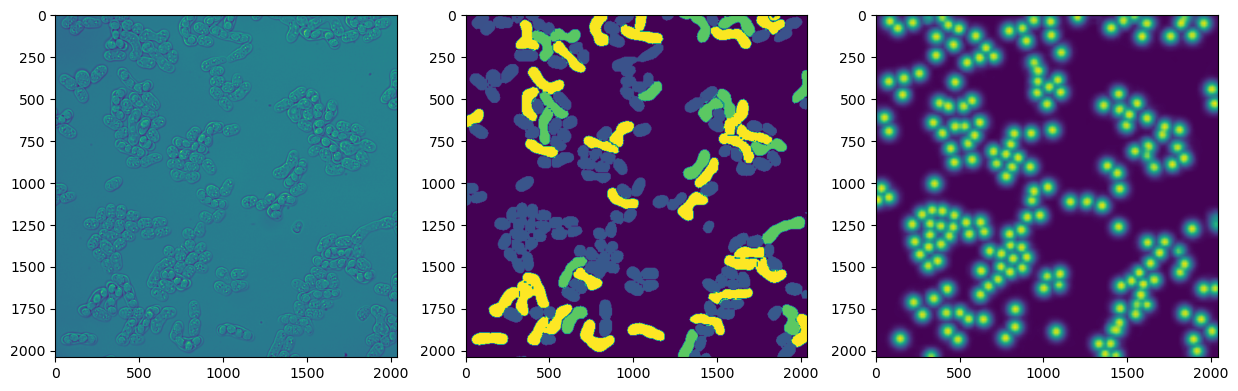

In [12]:
figs, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(img)
axs[1].imshow(output['panoptic_pred'][0])
axs[2].imshow(output['center_heatmap'][0])
# axs[3].imshow(post_ouput)